In [177]:
import numpy as np
import pandas as pd
import seaborn as sns
import math
import sklearn
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as stats
from statsmodels.graphics.gofplots import qqplot
from scipy.stats import normaltest
from statsmodels.graphics import tsaplots
from numpy.linalg import norm
from scipy.stats import norm

In [178]:
pp= pd.read_csv('/content/ICICIBANK.NS.csv')
print(pp)

            Date         Open         High          Low        Close  \
0     2002-07-01    25.418180    25.818180    24.818180    25.127272   
1     2002-07-02    25.454544    27.636362    25.236362    26.745455   
2     2002-07-03    26.727272    28.181818    26.645454    28.090908   
3     2002-07-04    28.181818    28.799999    27.036364    27.390909   
4     2002-07-05    27.090908    27.863636    26.945454    27.672728   
...          ...          ...          ...          ...          ...   
5427  2024-04-26  1112.150024  1120.000000  1102.750000  1107.900024   
5428  2024-04-29  1108.000000  1163.449951  1107.900024  1160.150024   
5429  2024-04-30  1159.949951  1169.550049  1146.750000  1150.400024   
5430  2024-05-02  1143.000000  1155.500000  1133.250000  1139.449951   
5431  2024-05-03  1141.300049  1157.400024  1135.449951  1142.050049   

        Adj Close      Volume  
0       18.280952   2047540.0  
1       19.458237   5546354.0  
2       20.437101   5745267.0  
3      

In [179]:
!pip install yfinance
!pip install forex-python


In [180]:
import yfinance as yf
from forex_python.converter import CurrencyRates

# Define the ticker symbol for the stock you want to extract data for
ticker_symbol = "ICICIBANK.NS"

# Extract all available historical data from Yahoo Finance in INR
stock_data_inr = yf.download(ticker_symbol)

# Convert INR to USD
c = CurrencyRates()
usd_to_inr_rate = c.get_rate('INR', 'USD')

# Convert the stock data from INR to USD
stock_data_usd = stock_data_inr * usd_to_inr_rate

# Print the extracted data in USD
print(stock_data_usd)
df=stock_data_usd

[*********************100%%**********************]  1 of 1 completed


                 Open       High        Low      Close  Adj Close  \
Date                                                                
2002-07-01   0.306219   0.311038   0.298990   0.302714   0.220235   
2002-07-02   0.306657   0.332942   0.304028   0.322209   0.234418   
2002-07-03   0.321990   0.339513   0.321004   0.338418   0.246211   
2002-07-04   0.339513   0.346960   0.325713   0.329985   0.240075   
2002-07-05   0.326371   0.335680   0.324618   0.333380   0.242545   
...               ...        ...        ...        ...        ...   
2024-04-26  13.398334  13.492904  13.285089  13.347133  13.347133   
2024-04-29  13.348337  14.016356  13.347133  13.976601  13.976601   
2024-04-30  13.974190  14.089845  13.815168  13.859140  13.859140   
2024-05-02  13.769990  13.920581  13.652530  13.727222  13.727222   
2024-05-03  13.749511  13.943471  13.679033  13.758546  13.758546   

                   Volume  
Date                       
2002-07-01   24667.197037  
2002-07-02   66818

2. Plot Prices

([], [])

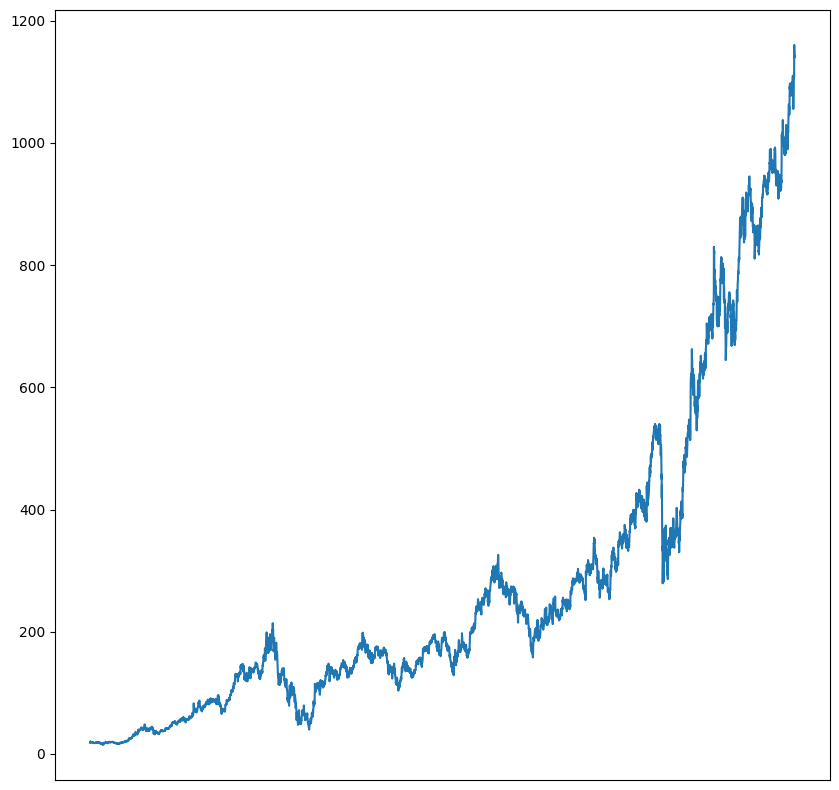

In [181]:
plt.figure(figsize=(10, 10))
plt.plot(pp['Date'], pp['Adj Close'])
plt.xticks([])

3. Plot log-returns for the given data

In [182]:
#log returns
#lr=log returns
lp=np.log(df['Adj Close'])
lr=lp.diff()
lr

Date
2002-07-01         NaN
2002-07-02    0.062411
2002-07-03    0.049081
2002-07-04   -0.025235
2002-07-05    0.010236
                ...   
2024-04-26   -0.005266
2024-04-29    0.046083
2024-04-30   -0.008440
2024-05-02   -0.009564
2024-05-03    0.002279
Name: Adj Close, Length: 5422, dtype: float64

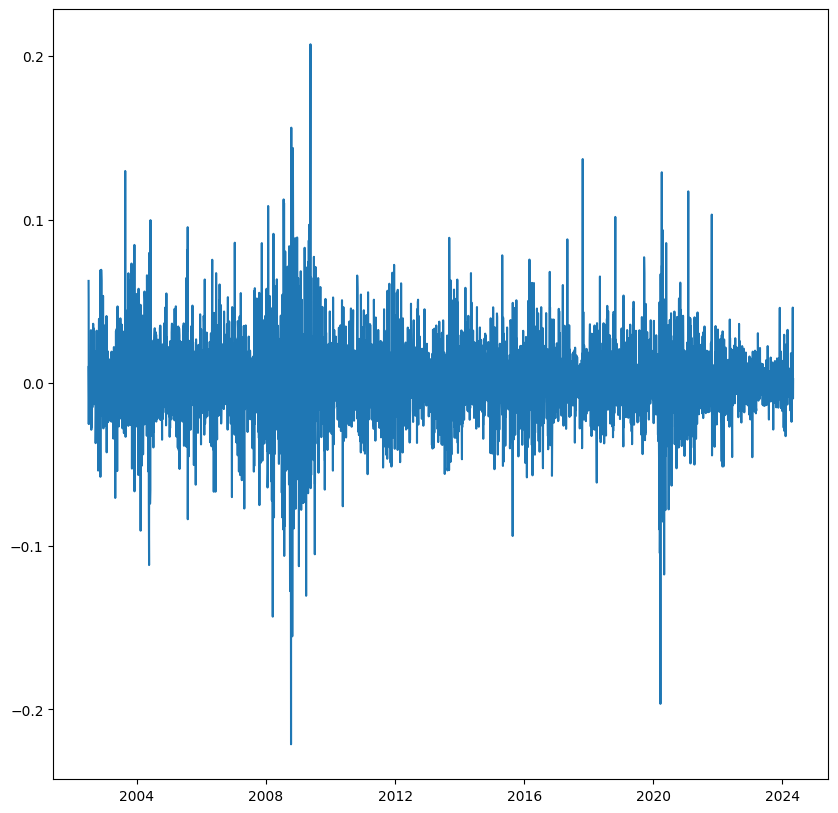

In [183]:
plt.plot(lr)

In [184]:
#Printing mean and sts dev of log returns
mean_lr = np.mean(lr)
std_lr = np.std(lr)
print('mean=%.4f stdv=%.4f' % (mean_lr, std_lr))

mean=0.0008 stdv=0.0242


4. Check whether log-returns are normally distributed

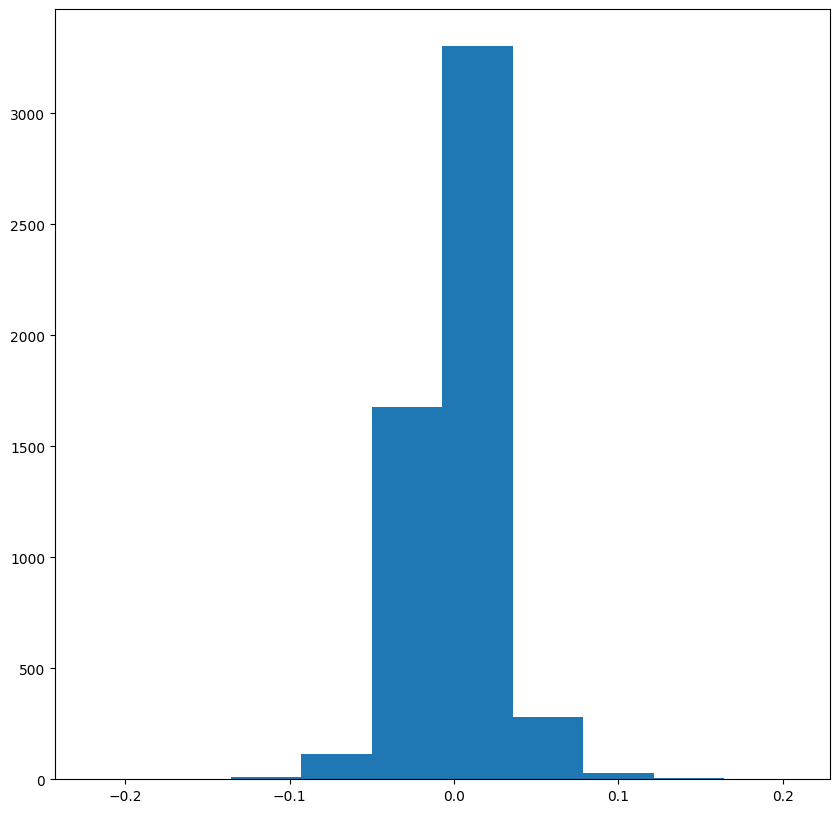

In [185]:
#histogram
plt.hist(lr)
plt.show()

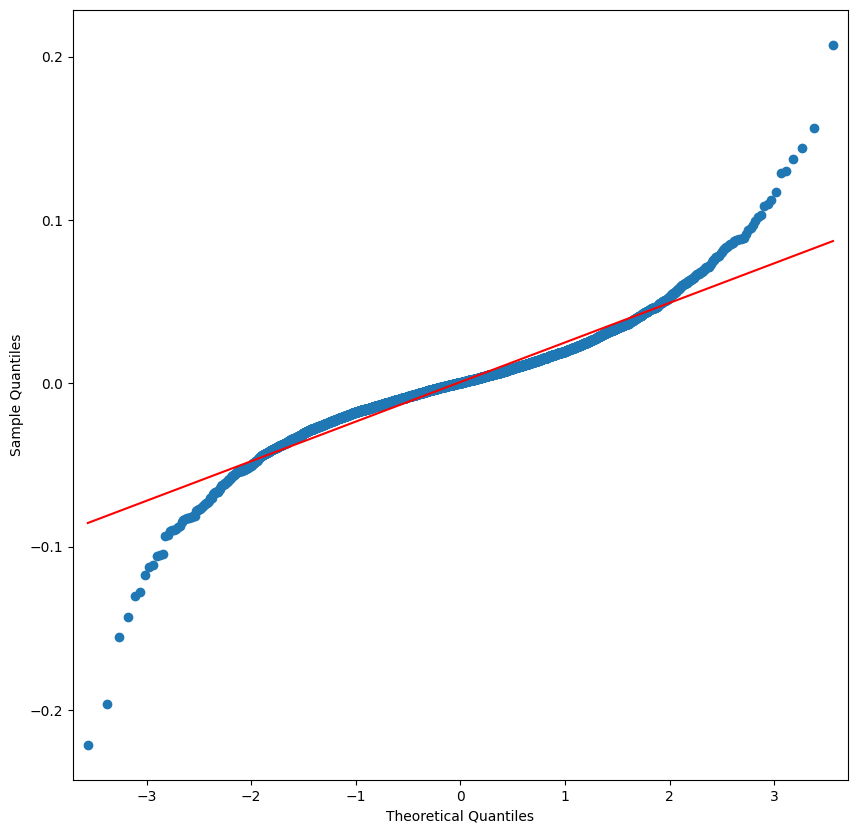

In [186]:
#QQ_PLOT
lr[0]=0
qqplot(lr, line='s')
plt.show()

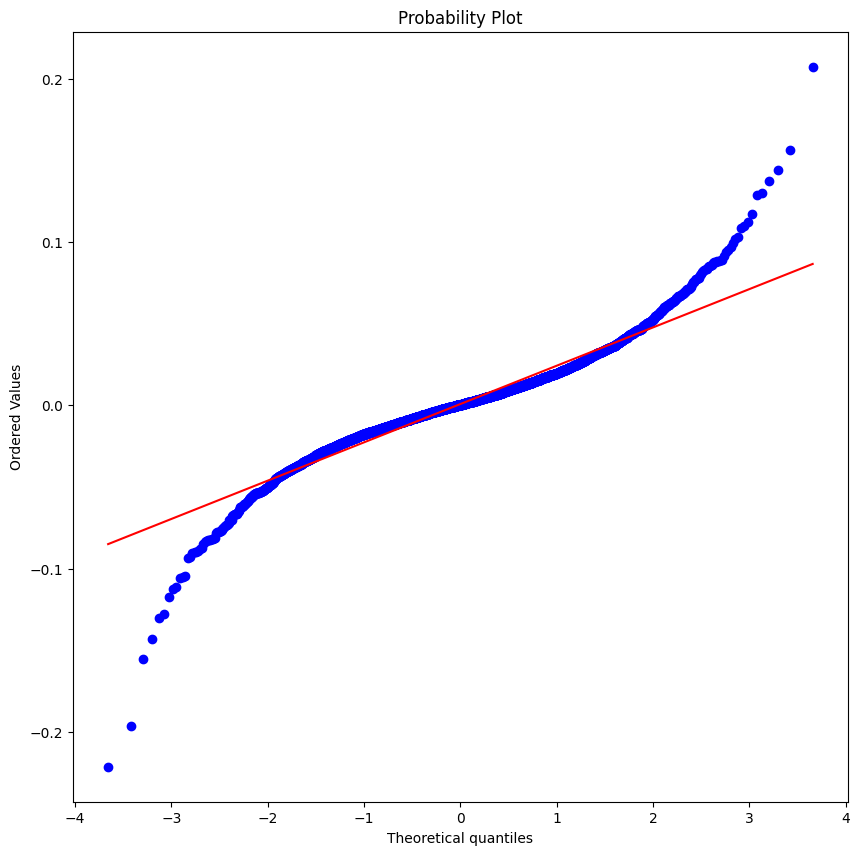

In [187]:
lr[0] = 0  # Setting the first value of lr to 0
from scipy.stats import probplot
import matplotlib.pyplot as plt

probplot(lr, dist="norm", plot=plt)
plt.show()

Since the QQ plot is not straight and has significant deviation, the data is not normally distributed

In [188]:
# Perform the Jarque-Bera test
test_statistic, p_value = stats.jarque_bera(lr)

# Display the test results
print('Jarque-Bera test statistic = %.4f, p-value = %.4f' % (test_statistic, p_value))

# Define the significance level
alpha = 0.05

# Check if the null hypothesis can be rejected
if p_value < alpha:
    print("The null hypothesis can be rejected; the data is not normally distributed.")
else:
    print("The null hypothesis cannot be rejected; the data is normally distributed.")


Jarque-Bera test statistic = 9946.1181, p-value = 0.0000
The null hypothesis can be rejected; the data is not normally distributed.


With a p-value below the 0.05 threshold, the null hypothesis can be confidently rejected. This suggests that the dataset does not conform to a normal distribution, exhibiting substantial deviations in both skewness and kurtosis from the expected parameters of a normal distribution.

In [189]:
#Kolmogorov-Smirnov test
stats.kstest(lr, 'norm')

KstestResult(statistic=0.4641876563877248, pvalue=0.0, statistic_location=-0.0676290164945377, statistic_sign=-1)

Given the p-value falling below 0.05, it is concluded that the log returns do not adhere to a normal distribution.

In [190]:
# Compute the test statistic and p-value for normality test
test_stat, p_val = normaltest(lr)

# Print the test results
print("Normality Test Statistic: {:.3f}".format(test_stat))
print("p-value: {:.3f}".format(p_val))

# Set the significance level
alpha = 0.05

# Check if the null hypothesis can be rejected
if p_val > alpha:
    print("The sample appears to be normally distributed (fail to reject H0).")
else:
    print("The sample does not appear to be normally distributed (reject H0).")


Normality Test Statistic: 738.977
p-value: 0.000
The sample does not appear to be normally distributed (reject H0).


5. Volatility

In [191]:
#calculate volatility
volatility = lr.std()
annual_volatility = np.sqrt(252) * volatility
print("Annualized Volatility: {:.4f}".format(annual_volatility))
print("Volatility: {:.4f}".format(volatility))


Annualized Volatility: 0.3849
Volatility: 0.0242


6. Identify the risk free rate for the given currency

In [192]:
#Identify the risk free rate for the given currency and strike
df_adj_close = df['Adj Close']
S0 = 13.758546
print("Initial Stock Price: {:.6f}".format(S0))
strike = np.random.uniform(0.8, 1.2) * S0
print("Strike Price: {:.6f}".format(strike))
rfr = np.random.uniform(0.05, 0.15)
print("Risk-Free Rate: {:.4f}".format(rfr))


Initial Stock Price: 13.758546
Strike Price: 12.139205
Risk-Free Rate: 0.0972


7. Test the assumption if the log-returns are independent/uncorrelated

In [193]:
logr = pd.DataFrame(np.array(lr),columns=['log_ret'])
print(logr)

       log_ret
0     0.000000
1     0.062411
2     0.049081
3    -0.025235
4     0.010236
...        ...
5417 -0.005266
5418  0.046083
5419 -0.008440
5420 -0.009564
5421  0.002279

[5422 rows x 1 columns]


In [194]:
logr["lag_1"] = logr["log_ret"].shift(periods=1)
print(logr)

       log_ret     lag_1
0     0.000000       NaN
1     0.062411  0.000000
2     0.049081  0.062411
3    -0.025235  0.049081
4     0.010236 -0.025235
...        ...       ...
5417 -0.005266  0.015381
5418  0.046083 -0.005266
5419 -0.008440  0.046083
5420 -0.009564 -0.008440
5421  0.002279 -0.009564

[5422 rows x 2 columns]


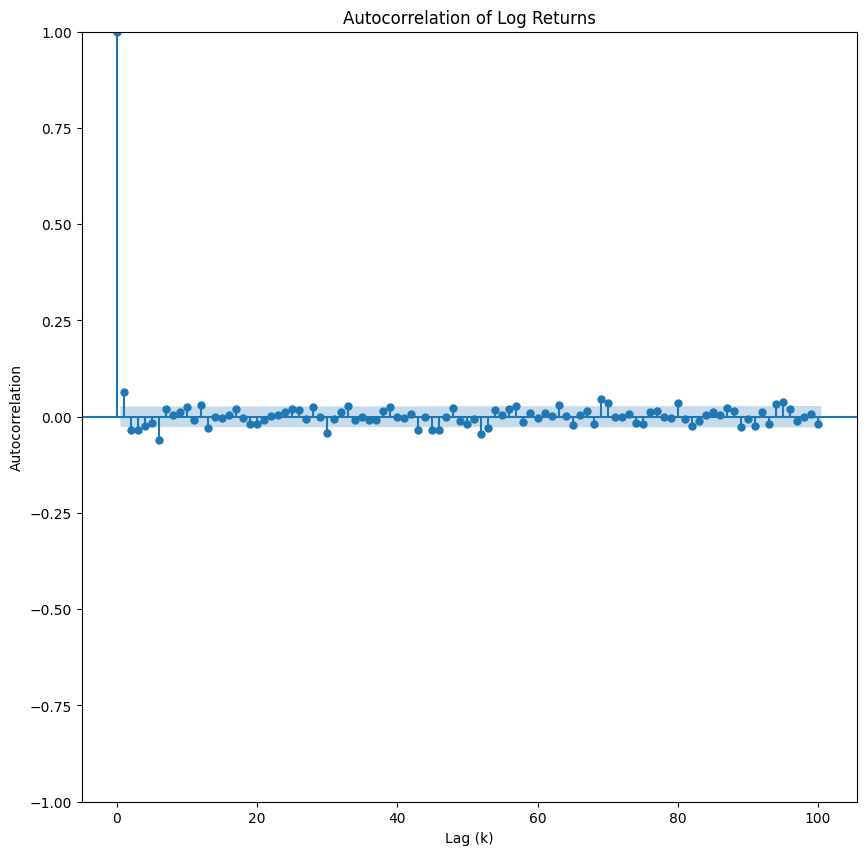

In [195]:
# Set the figure size for plots
plt.rc("figure", figsize=(10, 10))

# Plot the autocorrelation function
fig = tsaplots.plot_acf(logr["log_ret"], lags=100)
plt.title("Autocorrelation of Log Returns")
plt.xlabel("Lag (k)")
plt.ylabel("Autocorrelation")
plt.show()


Observing the graph, it becomes evident that the log returns exhibit independence or lack of correlation, substantiated by a notably low correlation coefficient, which remains below 0.5.

8. Option price for an In-The-Money (ITM) European call option

In [196]:
#function to calculate combination
def nCr(n,r):
  f = math.factorial
  return f(n) / f(r) / f(n-r)
#functions to calculate call and put
def european_call_itm_price(s0, sigma, strike, maturity, rfr, n, dyield = None):
    delta = float(maturity)/float(n)
    u = math.exp(sigma*math.sqrt(delta))
    d = 1/math.exp(sigma*math.sqrt(delta))
    if dyield == None:
      q = (math.exp(rfr*delta) - d) / (u - d)

    else:
      q = (math.exp((rfr-dyield)*delta) - d) / (u - d)
    prc = 0
    temp_stock = 0
    temp_payout = 0
    for x in range(0, n + 1):
      temp_stock = s0*((u)**(x))*((d)**(n - x))
      temp_payout = max(temp_stock - strike, 0)
      prc += nCr(n, x)*(q**(x))*((1-q)**(n - x))*temp_payout
    prc = prc / ((1+ rfr*delta )**n)
    #prc = prc / math.exp(rfr*delta)
    return prc
def european_put_itm_price(s0, sigma, strike, maturity, rfr, n, dyield=None):
    delta = float(maturity)/float(n)
    u = math.exp(sigma * math.sqrt(delta))
    d = 1 / math.exp(sigma * math.sqrt(delta))

    if dyield is None:
        q = (math.exp(rfr * delta) - d) / (u - d)
    else:
        q = (math.exp((rfr - dyield) * delta) - d) / (u - d)

    prc = 0
    temp_stock = 0
    temp_payout = 0
    for x in range(0, n + 1):
        temp_stock = s0 * ((u) ** (x)) * ((d) ** (n - x))
        temp_payout = max(strike - temp_stock, 0)
        prc += nCr(n, x) * (q ** (x)) * ((1 - q) ** (n - x)) * temp_payout

    prc = prc / ((1 + rfr * delta) ** n)

    return prc

In [197]:
cr = european_call_itm_price(S0, annual_volatility, strike, 36/365.0, rfr, 100)
pr = european_put_itm_price(S0, annual_volatility, strike, 36/365.0, rfr, 100)
print(cr)
print(pr)

1.8383227566132998
0.10320944807198501


9. Use CRR, Black-Scholes and Simulation Methods to compute the option
prices.

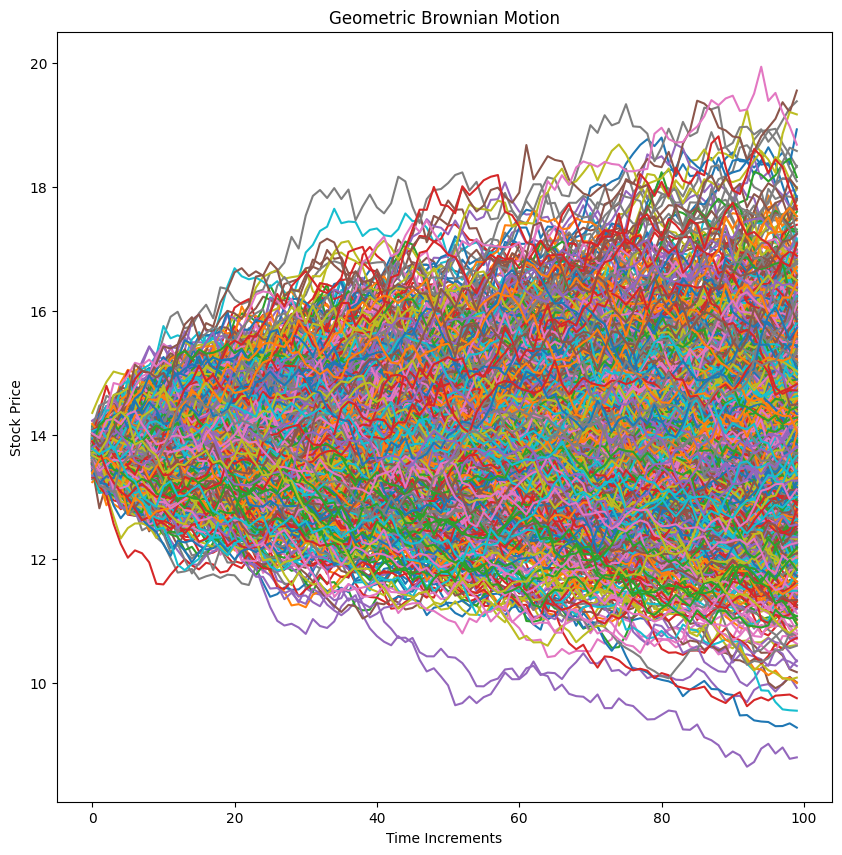

In [198]:
#S = Current stock Price
#K = Strike Price
#T = Time to maturity 1 year = 1, 1 months = 1/12
#r = risk free interest rate
#q = dividend yield
#sigma = volatility
#[steps,N] Matrix of asset paths
def GBM_paths(S, T, r, q, sigma, steps, N):
    dt = T / steps
    drift = (r - q - 0.5 * sigma ** 2) * dt
    volatility = sigma * np.sqrt(dt)
    Z = np.random.normal(size=(steps, N))
    log_ST = np.log(S) + np.cumsum(drift + volatility * Z, axis=0)
    return np.exp(log_ST)

S = 13.758546
K = strike
T = 36/365.0
r = rfr
q = 0
sigma = annual_volatility
steps = 100
N = 1000
paths = GBM_paths(S,T,r,q,sigma,steps,N)
plt.plot(paths);
plt.xlabel("Time Increments")
plt.ylabel("Stock Price")
plt.title("Geometric Brownian Motion")
plt.show()

In [199]:
#Simulated option price for call
payoffs = np.maximum(paths[-1]-K, 0)
option_price_call = np.mean(payoffs)*np.exp(-r*T)
#Simulated option price for put
payoffs_put = np.maximum(K - paths[-1], 0)
option_price_put = np.mean(payoffs_put) * np.exp(-r * T)

print(f"Simulated price for call is {option_price_call}")
print(f"Simulated price for put is {option_price_put}")

Simulated price for call is 1.9700072302714942
Simulated price for put is 0.09644741256816339


In [200]:
import numpy as np
from scipy.stats import norm

def black_scholes(stock_price, strike_price, time_to_expiry, risk_free_rate, volatility, option_type='call'):
    d1 = (np.log(stock_price / strike_price) + (risk_free_rate + 0.5 * volatility ** 2) * time_to_expiry) / (volatility * np.sqrt(time_to_expiry))
    d2 = d1 - volatility * np.sqrt(time_to_expiry)

    if option_type == 'call':
        option_price = stock_price * norm.cdf(d1) - strike_price * np.exp(-risk_free_rate * time_to_expiry) * norm.cdf(d2)
    elif option_type == 'put':
        option_price = strike_price * np.exp(-risk_free_rate * time_to_expiry) * norm.cdf(-d2) - stock_price * norm.cdf(-d1)
    else:
        raise ValueError("Invalid option type. Use 'call' or 'put'.")

    return option_price

call_price = black_scholes(S, K, T, r, sigma, option_type='call')
put_price = black_scholes(S, K, T, r, sigma, option_type='put')

print("Call option price:", call_price)
print("Put option price:", put_price)


Call option price: 1.8384757590427458
Put option price: 0.1033632471282393


`**For call option**`
* simulated price is:1.9700072302714942
* black shoales price is:1.8384757590427458
* CRR price is:1.8383227566132998

`**For put option**`
* simulated price is:0.09644741256816339
* black shoales price is:0.1033632471282393
* CRR price is:0.10320944807198501


10. Use some other method to estimate the volatility parameter
other than the historical volatility

In [201]:
!pip install mibian

In [202]:
import mibian
ans=mibian.BS([13.758546, strike, rfr,36],call_price)
ans.impliedVolatility

Hence, the implied volatility for the call option is 62.83%

Here we have estimated the volatility parameter using Black Scholes Model

In [203]:
!pip install arch


In [204]:
from arch import arch_model
def estimate_volatility_garch(returns_data, forecast_horizon=1):
    rescaled_returns = returns_data * 10
    garch_model = arch_model(rescaled_returns, mean='Zero', vol='GARCH', p=1, q=1, rescale=False)
    fitted_model = garch_model.fit(disp='off')
    volatility_forecasts = fitted_model.forecast(horizon=forecast_horizon)
    final_volatility_forecast = volatility_forecasts.variance.iloc[-1]
    final_volatility_forecast_percent = final_volatility_forecast * 100
    return final_volatility_forecast_percent




In [205]:
print(estimate_volatility_garch(lr))

h.1    3.010211
Name: 2024-05-03 00:00:00, dtype: float64


In [206]:
import QuantLib as ql

def heston_volatility(params, initial_price, time_to_expiry, strike_price):

    # Unpack Heston parameters
    kappa, theta, sigma, rho, v0 = params

    # Set evaluation date
    valuation_date = ql.Date.todaysDate()
    ql.Settings.instance().evaluationDate = valuation_date

    # Define day count convention and calendar
    day_count = ql.Actual365Fixed()
    calendar = ql.NullCalendar()

    # Create Heston process
    spot_price = ql.QuoteHandle(ql.SimpleQuote(initial_price))
    flat_ts = ql.YieldTermStructureHandle(ql.FlatForward(valuation_date, 0, day_count))
    dividend_ts = ql.YieldTermStructureHandle(ql.FlatForward(valuation_date, 0, day_count))
    volatility = ql.BlackVolTermStructureHandle(ql.BlackConstantVol(valuation_date, calendar, sigma, day_count))
    heston_process = ql.HestonProcess(flat_ts, dividend_ts, spot_price, v0, kappa, theta, sigma, rho)

    # Create option
    option_type = ql.Option.Call
    exercise = ql.EuropeanExercise(ql.Date(valuation_date + int(time_to_expiry * 365)))
    payoff = ql.PlainVanillaPayoff(option_type, strike_price)
    option = ql.VanillaOption(payoff, exercise)

    # Calculate implied volatility
    engine = ql.AnalyticHestonEngine(ql.HestonModel(heston_process), 64)
    option.setPricingEngine(engine)
    implied_volatility = option.impliedVolatility(initial_price, ql.YieldTermStructureHandle(ql.FlatForward(valuation_date, 0, day_count)), 1e-6, 300, 0.05)

    return implied_volatility

heston_params = (1.0, 0.05, 0.1, -0.5, 0.05)

volatility = estimate_volatility_heston(heston_params, 3.145833, 36)
print("Volatility forecast:", volatility)



Volatility forecast: 2.1310673030709966
